### Preamble

Before the hack-night begins, you should have obtained, after registration, NDNS 'TAB' data. If you haven't done this yet, then please follow the instructions in the README_PREHACK file. You then need to edit and then execute the following to produce a nice mash of the survey data with greenhouse gas emissions data.  This will take between four and ten minutes to run, and requires 2GB of working memory; **HEED THIS**: if you have any less than 4GB system memory and/or any more than a terminal and an editor also running you SHOULD follow the advanced instructions in the README and avoid executing the following cell.

***BEWARE OF EXECUTING THIS BOX ANY MORE THAN YOU NEED TO, i.e., ONCE ONLY!***
(edit the "ndns_dir" to match whereever you put the downloaded NDNS file; choose any string for your "tag" - just make sure you use the same tag again later on, in a few lines)

In [1]:
from  ndns_to_csv  import  mash_files

mash_files  (ndns_dir  =  '/Users/mbesssb5/Dropbox/scratch/food/NDNS/20180919/UKDA-6533-tab/tab/',
             tag  =  '_20180920')

Read in 5684 lines of nutrition (expected 5684).
Read in 5687 lines of ./Intake24_based_GHGs_20180611.csv (expected 5687).


[get a cup of tea while it runs]

You will now have six comma-separated variables files, which you should take as the starting point of the hackathon.

***

# Hack-Night Kick-off

### *A notebook which you can take as a starting point in your exploration of our data.*

Boilerplate code which sets python up with the functionality we need.

In [2]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os
%matplotlib inline

sns.set_style('dark')

A couple of convenience variables: the version of the data we want to use.

In [3]:
tag      =  '20180920'

The directory which holds our data files.

In [4]:
plot_dir  =  '.'

Read in the table of all the foods people ate.

In [5]:
eaten  =  pd.read_csv (plot_dir + '/eaten_table_' + tag + '.csv')
eaten

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SurveyYear,Age,Sex,Country,DayofWeek,DayNo,DiaryDaysCompleted,MealTimeDescription,MealTime,MainFoodGroupCode,...,CottageCheese,CheddarCheese,OtherCheese,AllCheese,AllFish,AllMeat,AllAnimal,CO2e,Units,KCALS_personday
0,6,45,2,Wales,7,1,4,2pm to 4:59pm,13.999722,7,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,59.701800,Grams,1991.1460
1,6,45,2,Wales,7,1,4,8pm to 9:59pm,19.999722,7,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,59.701800,Grams,1991.1460
2,6,45,2,Wales,3,4,4,8pm to 9:59pm,21.000000,7,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,90.710656,Grams,1310.4855
3,6,45,2,Wales,1,2,4,12 noon to 1:59pm,12.000000,59,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,217.203662,Grams,1342.5188
4,6,45,2,Wales,2,3,4,9am to 11:59am,9.000000,59,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,163.058830,Grams,1539.9350
5,6,45,2,Wales,2,3,4,12 noon to 1:59pm,12.000000,59,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,163.058830,Grams,1539.9350
6,6,45,2,Wales,7,1,4,5pm to 7:59pm,16.999722,8,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,120.533602,Grams,1991.1460
7,6,45,2,Wales,3,4,4,12 noon to 1:59pm,13.000000,21,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,45.116867,Grams,1310.4855
8,6,45,2,Wales,3,4,4,12 noon to 1:59pm,13.000000,16,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,207.942018,Grams,1310.4855
9,6,45,2,Wales,3,4,4,12 noon to 1:59pm,13.000000,50,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,65.855364,Grams,1310.4855


The dataset is complex, so a second table is provided with descriptions of all column names. Below is a convenience function for accessing the 'Descriptions' column for a given column name.
The recommended daily allowance (RDA) is given for some of the columns but isn't relevant for others, in which case it is set to NaN - i.e. don't panic that rda_m is NaN for FoodName when you view this.

In [14]:
# read in col description table

columnDescription = pd.read_csv (plot_dir + '/eaten_table_column_info_' + tag + '.csv')

columnDescription

,Names,descriptions,short_colnames,rda_m,rda_f,rda_m_7_10,rda_f_7_10,ul_m,ul_f
0,FoodNumber,FoodNumber,FoodNumber,NaN,NaN,NaN,NaN,NaN,NaN
1,FoodGroupCode,FoodGroupCode,FoodGroupCode,NaN,NaN,NaN,NaN,NaN,NaN
2,FoodName,FoodName,FoodName,NaN,NaN,NaN,NaN,NaN,NaN
3,FoodCategory,FoodCategory,FoodCategory,NaN,NaN,NaN,NaN,NaN,NaN
4,Description,Description,Description,NaN,NaN,NaN,NaN,NaN,NaN
5,Dilution,Dilution,Dilution,NaN,NaN,NaN,NaN,NaN,NaN
6,Comment,Comment,Comment,NaN,NaN,NaN,NaN,NaN,NaN
7,EdiblePortion,EdiblePortion,EdiblePortion,NaN,NaN,NaN,NaN,NaN,NaN
8,CO2eRef,Reference information for the CO2e number used,CO2eRef,NaN,NaN,NaN,NaN,NaN,NaN
9,FoodAisle,FoodAisle (a food categorisation used for grou...,FoodAisle,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# function for handling lookups

def get_info(colName,CDs = columnDescription):
    """returns description value from Column Description table"""
    
    return CDs.loc[CDs['Names'] == colName]['descriptions'].values[0]

# try it for pork
get_info('Pork')

'Percentage of Pork'

# Histograms for basic data exploration
Plot a histogram of the time people ate each food item.

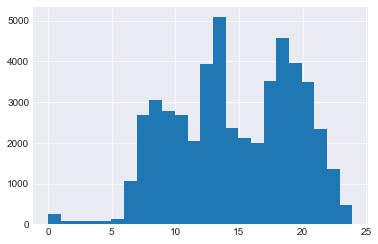

In [16]:
eaten['MealTime'].hist(bins=24)
plt.show()

Plot a bar chart of the day number since the person started the survey...

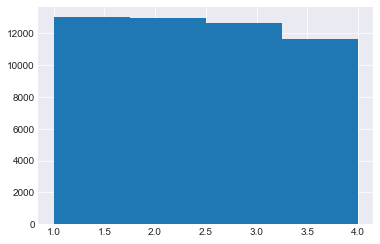

In [17]:
eaten['DayNo'].hist(bins=4)
plt.show()

...you can see a slight drop-off as some people didn’t complete all 4 days.

Plot a histogram of the day of the week (Monday = 1 etc).

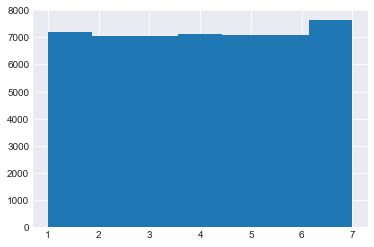

In [18]:
eaten['DayofWeek'].hist(bins=7)
plt.show()

# Plot a histogram of the number of kcal of each food item eaten.

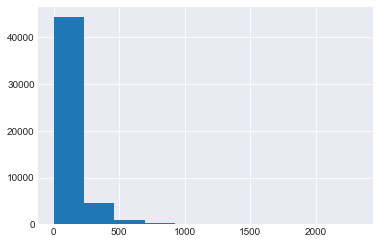

In [19]:
fig, ax = plt.subplots()
eaten['KCALS'].hist(ax=ax)
# ax.loglog()
plt.show()

...has a big spike at zero - due to things like tap water.

Take a look at the FoodAisle column.

In [20]:
for f in np.unique(eaten['FoodAisle']):
    print(f)

Alcoholic drinks
Bacon, ham, pork
Beef and lamb
Bread, pasta, cereal
Cakes, biscuits, puddings
Cheese and butter
Chicken and turkey
Chocolate
Coffee
Commercial toddlers foods and drinks
Cooked vegetables
Dietary supplements
Eggs
Fish
Fruit, fruit juice
Jam, marmalade, other preserves, sweet spreads
Legumes, beans, pulses
Milk and cream
Nuts and seeds
Other drinks
Other meat
Potato
Rice
Salad and raw veg
Savoury sauces, pickles, gravies & condiments
Soft drinks, bottled water
Sugar, sweets
Tap water
Tea


Each food is assigned one of the above “aisles” (categories). We can use this to work out the average amount of food per day in each FoodAisle. We can also average the kcal of all the foods in this FoodAisle. Ditto GHGE, and nutrients.

Read in the table containing the average per FoodAisle...

In [21]:
eaten_table_aisle  =  pd.read_csv (plot_dir + '/eaten_table_aisle_' + tag +'.csv')
eaten_table_aisle

,Units,FoodAisle,Base,ACAR,ALCO,BCAR,BCRYPT,BIOT,CA,CHO,...,CannedTuna,Shellfish,CottageCheese,CheddarCheese,OtherCheese,AllCheese,AllFish,AllMeat,AllAnimal,CO2e
0,Grams,"Cakes, biscuits, puddings",44.045365,0.405216,0.005461,17.172574,0.114384,1.743375,40.166785,22.850325,...,0.000000,0.000000,0.000000,0.013762,0.354482,0.368244,0.000000,0.000000,0.368244,114.599390
1,Grams,"Bread, pasta, cereal",202.114147,1.035035,0.000000,63.685713,5.718179,6.033314,239.628352,92.615903,...,0.145956,0.054233,0.000000,1.123000,2.473457,3.596456,0.200189,1.456386,5.253031,536.106595
2,Grams,Cheese and butter,37.266741,5.449525,0.000000,107.180680,0.000000,0.796270,134.485162,0.257816,...,0.000000,0.000000,0.828062,13.309979,5.989137,20.127178,0.000000,0.000000,20.127178,330.965934
3,Grams,Eggs,25.342423,0.022221,0.000000,2.655244,0.054586,4.208647,15.479753,0.548095,...,0.000000,0.000000,0.000000,0.097952,0.093400,0.191352,0.000000,0.190583,0.381935,124.297159
4,Grams,Other drinks,3.566354,0.000000,0.000000,0.580809,0.000000,0.404485,6.056473,1.657836,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.482666
5,Grams,"Sugar, sweets",16.596091,0.000000,0.000000,0.804314,0.022597,0.008489,2.207760,15.900452,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.578954
6,Grams,Chicken and turkey,54.928844,3.315382,0.000000,29.561160,1.783498,1.240495,10.724812,2.354561,...,0.000000,0.000000,0.000000,0.022056,0.043151,0.065208,0.000000,43.171479,43.236687,279.939333
7,Grams,"Fruit, fruit juice",167.385916,9.085366,0.000000,62.103108,32.979115,2.241464,19.547913,20.806507,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,239.777228
8,Grams,Cooked vegetables,138.973886,466.049493,0.000000,1860.092017,62.744487,1.995844,36.068091,7.662417,...,0.000000,0.000000,0.000000,0.094918,0.044593,0.139511,0.000000,0.118268,0.257779,276.076580
9,Grams,"Savoury sauces, pickles, gravies & condiments",40.405383,2.808908,0.000000,120.158759,6.122978,0.744066,18.279696,5.353426,...,0.000000,0.001343,0.000000,0.021052,0.186962,0.208015,0.019053,0.120819,0.347886,122.415628


... and the extra column information e.g. RDAs.

In [22]:
eaten_table_aisle_column_info  =  pd.read_csv (plot_dir + '/eaten_table_aisle_column_info_' + tag +'.csv')
eaten_table_aisle_column_info

,Names,descriptions,short_colnames
0,Units,Units,Units
1,FoodAisle,FoodAisle (a food categorisation used for grou...,FoodAisle
2,Base,Quantity,Quantity
3,ACAR,Alpha-carotene (μg),acar
4,ALCO,Alcohol (g),Alcohol
5,BCAR,Beta-carotene (μg),BCar
6,BCRYPT,Beta cryptoxanthin (μg),BCrypt
7,BIOT,Biotin (μg),Biot
8,CA,Calcium (mg),Ca
9,CHO,Carbohydrate (g),Carb


## Plot the amount of KCals consumed per food aisle

In [23]:
eaten_table_aisle.columns

Index(['Units', 'FoodAisle', 'Base', 'ACAR', 'ALCO', 'BCAR', 'BCRYPT', 'BIOT',
       'CA', 'CHO', 'CHOL', 'CL', 'CMON', 'CN3', 'CN6', 'CU', 'ENGFIB', 'FAT',
       'FE', 'FOLT', 'FRUCT', 'GLUC', 'HFE', 'I', 'K', 'KCALS', 'KJ', 'LACT',
       'MALT', 'MG', 'MILK', 'MN', 'NA', 'NCF', 'NHFE', 'NIACEQU', 'NMILK',
       'OSUG', 'P', 'PANTO', 'PROT', 'RET', 'RIBO', 'SATFA', 'SE', 'STAR',
       'SUCR', 'THIA', 'TOTCAR', 'TOTNIT', 'TOTSUG', 'TRANS', 'VITA', 'VITB12',
       'VITB6', 'VITC', 'VITD', 'VITE', 'WATER', 'ZN', 'Fruit', 'DriedFruit',
       'FruitJuice', 'SmoothieFruit', 'Tomatoes', 'TomatoPuree',
       'Brassicaceae', 'YellowRedGreen', 'Beans', 'Nuts', 'OtherVeg', 'Beef',
       'Lamb', 'Pork', 'ProcessRedMeat', 'OtherRedMeat', 'Burgers', 'Sausages',
       'Offal', 'Poultry', 'ProcessedPoultry', 'GameBirds', 'WhiteFish',
       'OilyFish', 'CannedTuna', 'Shellfish', 'CottageCheese', 'CheddarCheese',
       'OtherCheese', 'AllCheese', 'AllFish', 'AllMeat', 'AllAnimal', 'CO2e'],


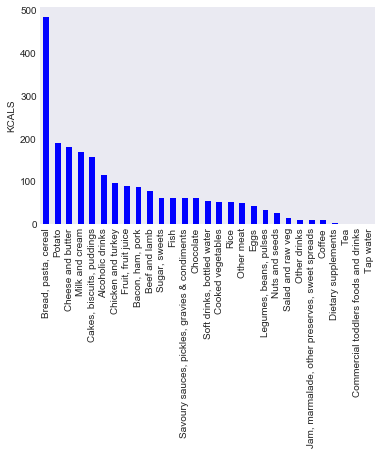

In [24]:
colname = 'KCALS'
# sort table
eaten_table_aisle = eaten_table_aisle.sort_values(colname,ascending=False)

# plot
ax = eaten_table_aisle[colname].plot(kind='bar',color='blue')
ax.set_ylabel(colname)

# label
ax.set_xticklabels(np.array(eaten_table_aisle['FoodAisle'],dtype=str))
plt.show()

# Stack plots

We've already been thinking of ways to visualize the data: our current best effort is in the stack_plotting module, in a file called `stack_plotting.py` which you will have pulled with this repository.  On first reading, step over these details and jump to the quick usage example below.  Once you have seen the whole notebook you may be interested in developing better visualization of the data, and maybe you will want to use this as a jumping-off point...?  You will also read about other options available in our plotting function if you look into that file.

Here we start by bringing the module into the notebook.

In [25]:
from stack_plotting import stack_plot, food_stack_plot

A quick and simple example of how to use the above function.

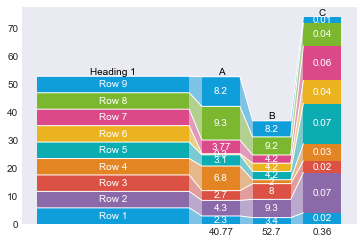

In [26]:
stack_plot (["Heading 1", "A", "B", "C"],
            [["Row 1", 2.3, 3.4, 0.02],
             ["Row 2", 4.3, 9.3, 0.07],
             ["Row 3", 2.7, 8, 0.02],
             ["Row 4", 6.8, 2, 0.03],
             ["Row 5", 3.1, 4.2, 0.07],
             ["Row 6", 0.3, 4.2, 0.04],
             ["Row 7", 3.77, 4.2, 0.06],
             ["Row 8", 9.3, 9.2, 0.04],
             ["Row 9", 8.2, 8.2, 0.01]],
            scale=[1,1,0.7,1.4])

Now to work.  Stack up the GHGE and kcal for each FoodAisle.

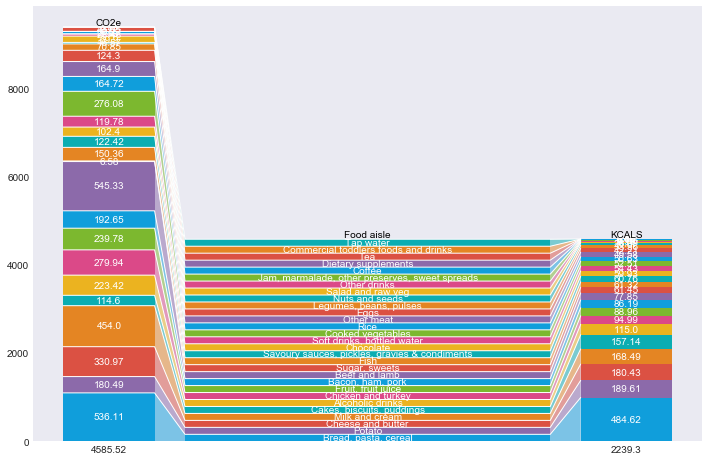

In [27]:
from  stack_plotting  import  food_stack_plot

#  Assemble three columns.
a = eaten_table_aisle['CO2e'].tolist()

b = eaten_table_aisle['FoodAisle'].tolist()

c = eaten_table_aisle['KCALS'].tolist()

#  A function to turn row-major matrices (list of lists) to column-major.
def  transpose  (X):
    return [[X [a][b]  for  a  in  range(len(X))]   for  b  in  range(len(X[0]))]


#  Make the plot nice and big.
plt.rcParams['figure.figsize'] = [12,8]

#  Do the plot.
food_stack_plot (['CO2e', 'Food aisle', 'KCALS'], transpose ([a,b,c]))

#  Put the plot size back, so we don't upset the rest of this notebook.
plt.rcParams['figure.figsize'] = [6,4]

Make a version showing several key nutrients too.

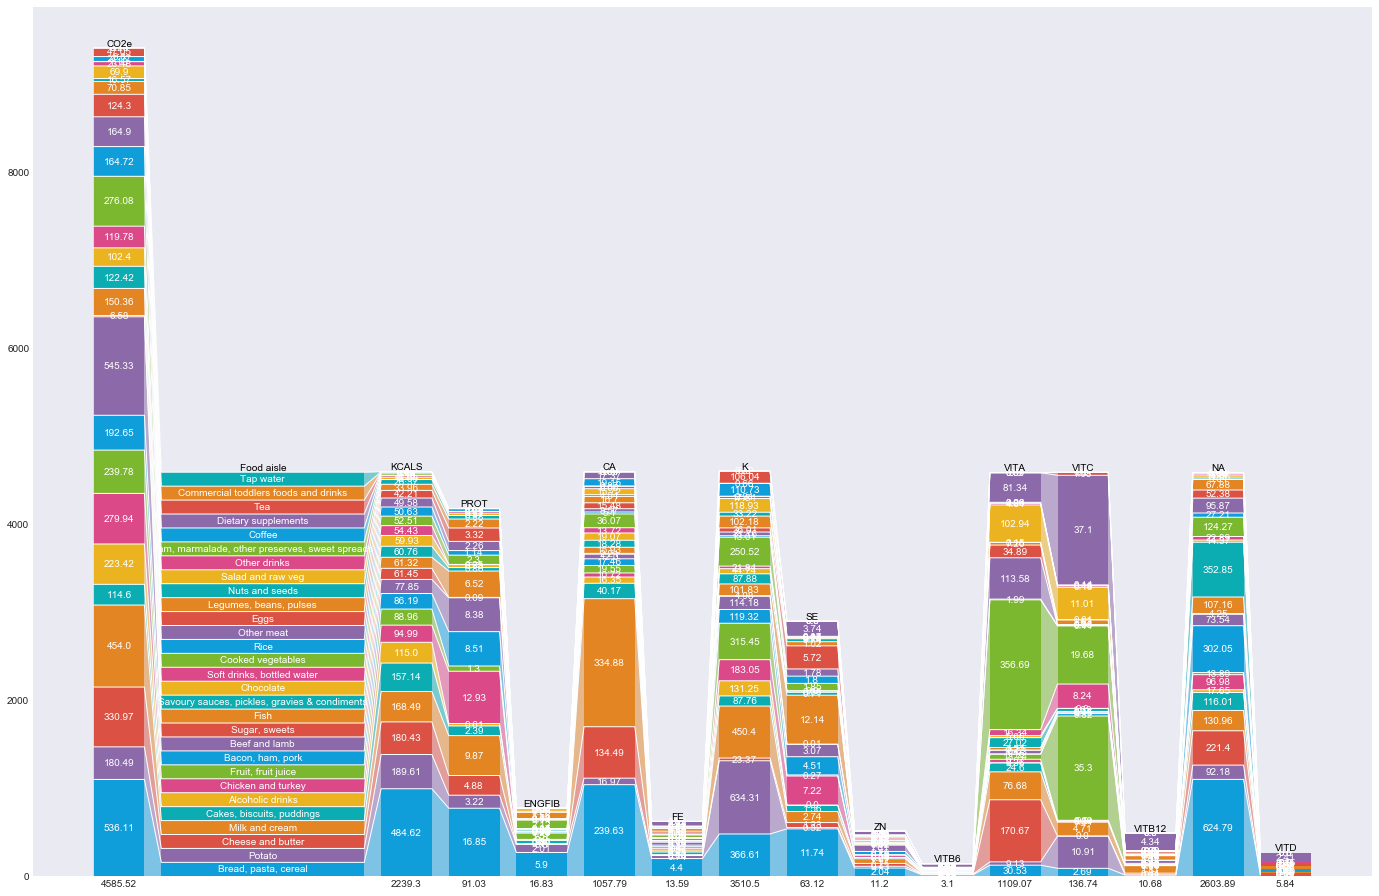

In [28]:
#  Assemble three columns.

data = [eaten_table_aisle['CO2e'].tolist(),
        eaten_table_aisle['FoodAisle'].tolist(),
        eaten_table_aisle['KCALS'].tolist()]
headings = ['CO2e', 'Food aisle', 'KCALS']


for  a  in  ('PROT','ENGFIB','CA','FE','K','SE','ZN',
             'VITB6','VITA','VITC','VITB12','NA','VITD'):
    data.append (eaten_table_aisle[a].tolist())
    headings.append (a)


#  Make the plot nice and big.
plt.rcParams['figure.figsize'] = [24,16]

#  Do the plot.
food_stack_plot (headings, transpose (data))

#  Put the plot size back, so we don't upset the rest of this notebook.
plt.rcParams['figure.figsize'] = [6,4]

# CO2e by age?

I was interested to understand if different age categories had different environmental impacts.

I averaged over number of individuals in the cohort, and calculated this per day, in order to compensate for any age cohort-specific effect of missing days.

In [29]:
eaten['age_cat'] = pd.cut(eaten['Age'], 5)

# group by participant and sum co2e of food intake
#
by_participant = eaten.groupby(['seriali','age_cat','DayNo']).sum()
day_mean_by_age_cat =  by_participant.groupby(['age_cat']).mean()['CO2e']
day_mean_by_age_cat

age_cat
(18.955, 28.0]    5181.941972
(28.0, 37.0]      5089.655060
(37.0, 46.0]      5022.947375
(46.0, 55.0]      5102.926757
(55.0, 64.0]      5238.895225
Name: CO2e, dtype: float64

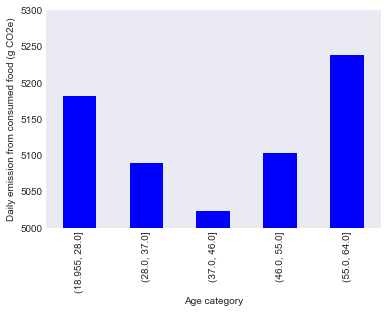

In [31]:
ax = day_mean_by_age_cat.plot(kind='bar',color='blue')
ax.set_ylim((5000,5300))
ax.set_ylabel('Daily emission from consumed food (g CO2e)')
ax.set_xlabel('Age category')
plt.show()